In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pywt
import math


In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [3]:
def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level,take=N)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level,take=N)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))

In [59]:
index=13
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol

df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')

In [60]:
time_edr=df['time']
edr=df['edr']

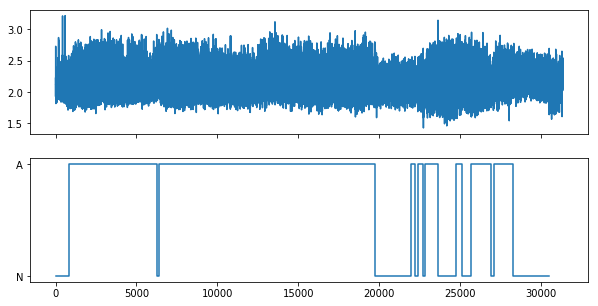

In [61]:
f, axarr = plt.subplots(2, sharex=True,figsize=(10,5))
axarr[0].plot(time_edr,edr)
axarr[1].step(time_apn,apn)


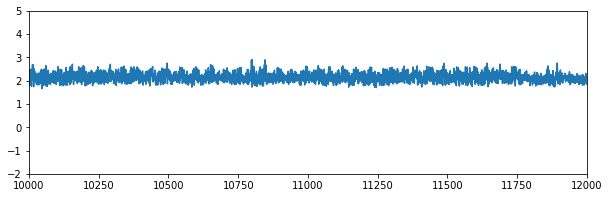

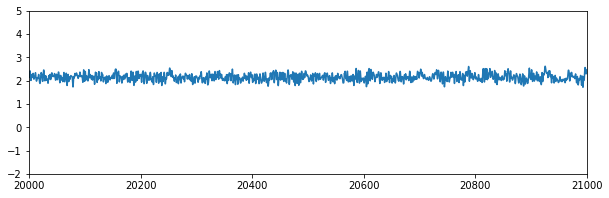

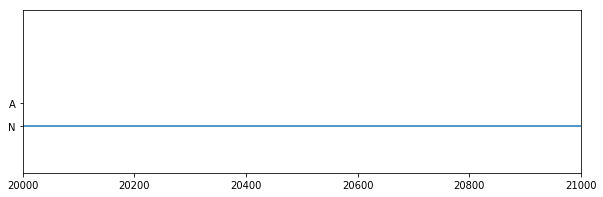

In [69]:
plt.figure(figsize=(10,3))
plt.axis([10000,12000,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([20000,21000,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([20000,21000,-2,5])
plt.step(time_apn,apn)


In [70]:
statistics.variance(edr[14000*2:15000*2])

0.053059958091956835

In [71]:
statistics.variance(edr[7000*2:8000*2])

0.048128356445214696

In [78]:
wavelet = pywt.Wavelet('db4')
from pywt import wavedec
coeffs = wavedec(edr, 'db4', level=9)
level = 9
A9 = wrcoef(edr, 'a', coeffs, 'db4', level)
D9 = wrcoef(edr, 'd', coeffs, 'db4', level)
D8 = wrcoef(edr, 'd', coeffs, 'db4', 8)
D7 = wrcoef(edr, 'd', coeffs, 'db4', 7)
D6 = wrcoef(edr, 'd', coeffs, 'db4', 6)
D5 = wrcoef(edr, 'd', coeffs, 'db4', 5)
D4 = wrcoef(edr, 'd', coeffs, 'db4', 4)
D3 = wrcoef(edr, 'd', coeffs, 'db4', 3)
D2 = wrcoef(edr, 'd', coeffs, 'db4', 2)
D1 = wrcoef(edr, 'd', coeffs, 'db4', 1)

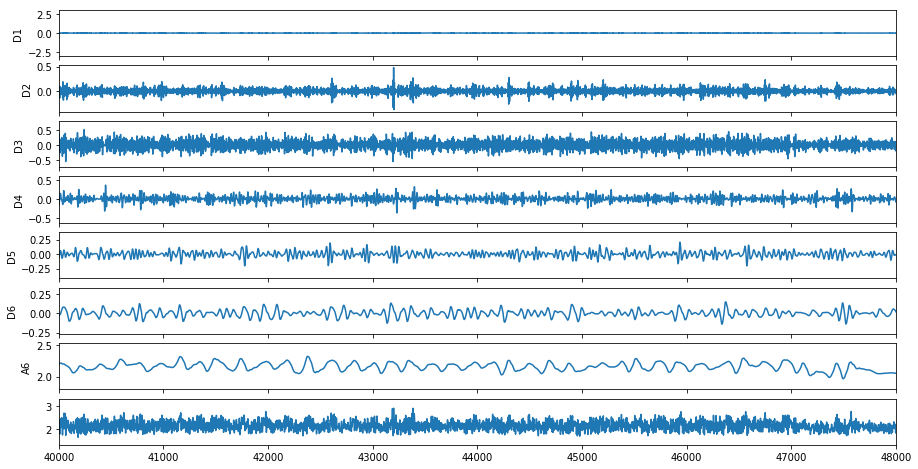

In [75]:
f, axarr = plt.subplots(8, sharex=True,figsize=(15,8))
axarr[0].axis([10000*4,12000*4,-3,3])
axarr[0].plot(D1)
axarr[0].set_ylabel('D1')
axarr[1].plot(D2)
axarr[1].set_ylabel('D2')
axarr[2].plot(D3)
axarr[2].set_ylabel('D3')
axarr[3].plot(D4)
axarr[3].set_ylabel('D4')
axarr[4].plot(D5)
axarr[4].set_ylabel('D5')
axarr[5].plot(D6)
axarr[5].set_ylabel('D6')
axarr[6].plot(D7)
axarr[6].set_ylabel('D8')
axarr[5].plot('D8')
axarr[5].set_ylabel('D9')
axarr[6].plot(D9)
axarr[6].set_ylabel('A9')
#axarr[7].set_ylabel('A9')

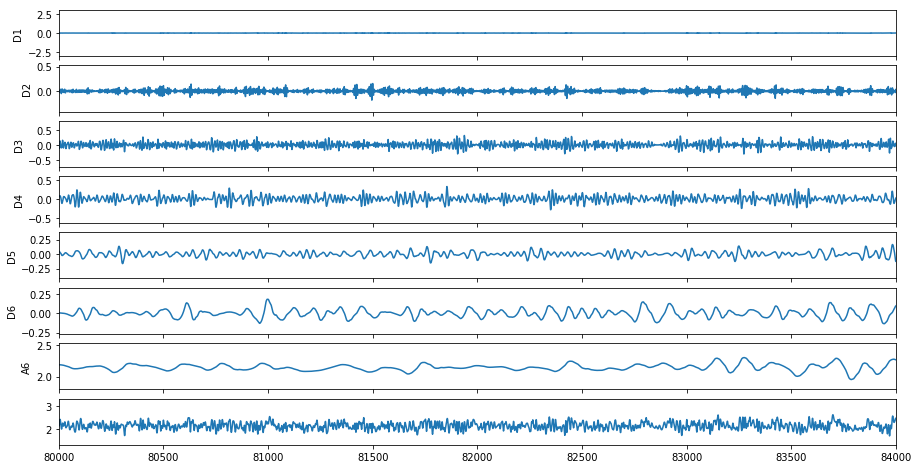

In [76]:
f, axarr = plt.subplots(8, sharex=True,figsize=(15,8))
axarr[0].axis([20000*4,21000*4,-3,3])
axarr[0].plot(D1)
axarr[0].set_ylabel('D1')
axarr[1].plot(D2)
axarr[1].set_ylabel('D2')
axarr[2].plot(D3)
axarr[2].set_ylabel('D3')
axarr[3].plot(D4)
axarr[3].set_ylabel('D4')
axarr[4].plot(D5)
axarr[4].set_ylabel('D5')
axarr[5].plot(D6)
axarr[5].set_ylabel('D6')
axarr[6].plot(A6)
axarr[6].set_ylabel('A6')
axarr[7].plot(edr)

In [50]:
statistics.variance(D3[10000*4:152000*4])

0.11370145234013268

In [77]:
statistics.variance(D3[20000*4:210000*4])

0.016834682416053296